<a href="https://colab.research.google.com/github/PranavBawgikar/PranavBawgikar/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/shivendutyagi/Datasets/main/mushrooms.csv')

In [4]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
for column in df.columns:
  print('Unique values in', column + ':', 
        df[column].unique())

Unique values in class: ['p' 'e']
Unique values in cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
Unique values in cap-surface: ['s' 'y' 'f' 'g']
Unique values in cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in bruises: ['t' 'f']
Unique values in odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in gill-attachment: ['f' 'a']
Unique values in gill-spacing: ['c' 'w']
Unique values in gill-size: ['n' 'b']
Unique values in gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in stalk-shape: ['e' 't']
Unique values in stalk-root: ['e' 'c' 'b' 'r' '?']
Unique values in stalk-surface-above-ring: ['s' 'f' 'k' 'y']
Unique values in stalk-surface-below-ring: ['s' 'f' 'y' 'k']
Unique values in stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values in stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Unique values in veil-type: ['p']
Unique values in veil-color: ['w' 'n' 'o' 'y']
Unique values in ring-number: ['o' 't' 'n']

In [6]:
y = df['class']

In [9]:
y[y == 'p'] = 1
y[y == 'e'] = 0
y = y.astype(np.uint8)

In [10]:
X = df.drop(['class'], axis = 1)
X_encoded = pd.get_dummies(X)

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_encoded, y, test_size = 0.3, random_state = 42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
dt = classifier.fit(Xtrain, ytrain)

In [15]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import sklearn
print(sklearn.__version__)

1.2.2


In [21]:
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

[Text(0.5882352941176471, 0.9375, 'odor_n <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2951, 2735]\nclass = Edible'),
 Text(0.35294117647058826, 0.8125, 'stalk-root_c <= 0.5\ngini = 0.28\nsamples = 3191\nvalue = [537, 2654]\nclass = Poisonous'),
 Text(0.23529411764705882, 0.6875, 'stalk-root_r <= 0.5\ngini = 0.122\nsamples = 2809\nvalue = [184, 2625]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.5625, 'odor_a <= 0.5\ngini = 0.044\nsamples = 2685\nvalue = [60, 2625]\nclass = Poisonous'),
 Text(0.11764705882352941, 0.4375, 'odor_l <= 0.5\ngini = 0.022\nsamples = 2654\nvalue = [29, 2625]\nclass = Poisonous'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.0\nsamples = 2625\nvalue = [0, 2625]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.3125, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = Edible'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]\nclass = Edible'),
 Text(0.29411764705882354, 0.5625, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]\

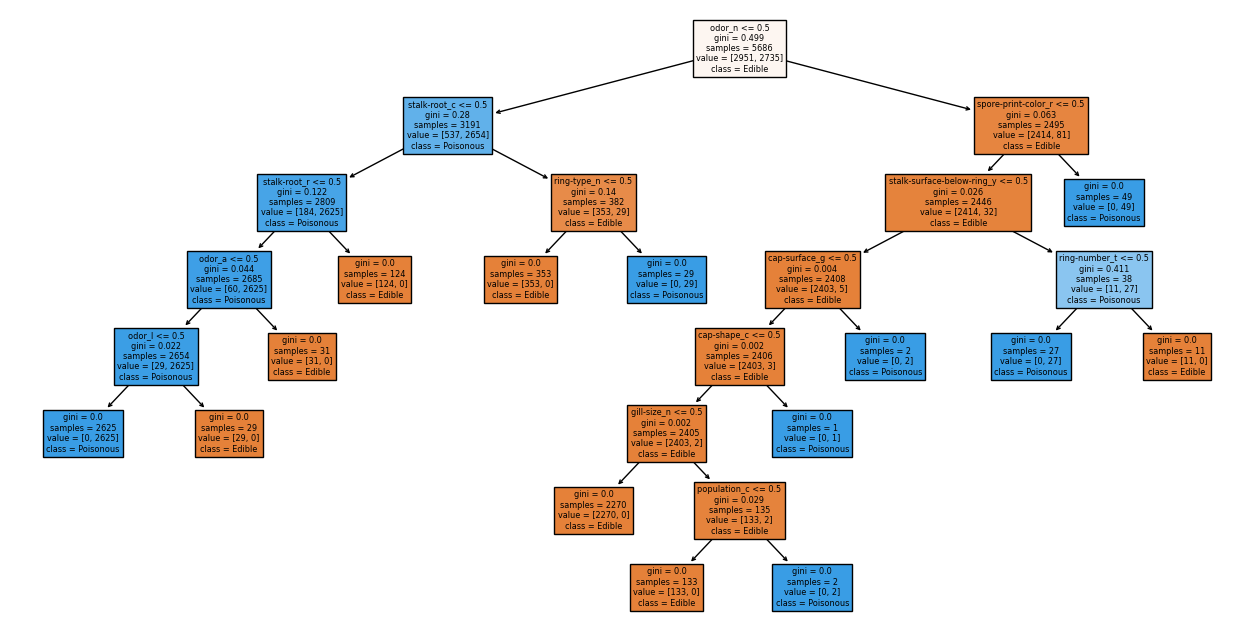

In [22]:
plt.figure(figsize = (16, 8))
plot_tree(dt, filled = True, class_names = ['Edible', 'Poisonous'], feature_names = X_encoded.columns)

In [23]:
scores = cross_val_score(dt, Xtrain, ytrain, cv = 5)
for score in scores:
  print('Accuracy: ', round(score, 4))

Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  0.9982


In [29]:
print(np.unique(ytest))

[0 1]


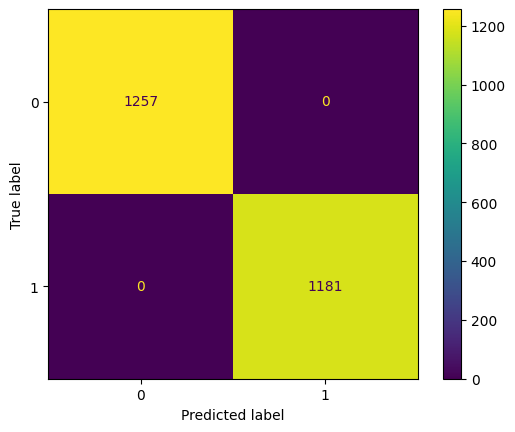

In [33]:
class_labels = [0, 1]
cm = confusion_matrix(ytest, dt.predict(Xtest), labels = class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()